CREDIT CARD FRAUD DETECTION

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

importing the library to split our data into test and train data

In [5]:
from sklearn.model_selection import train_test_split

impoting the library to calculate the accuaracy of our model used

In [6]:
from sklearn.metrics import accuracy_score,classification_report

In [7]:
#loading the dataset to panda dataframe
creditCardData=pd.read_csv('creditcard.csv')

In [8]:
#viewing the first five and last five values in the dataset
creditCardData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
creditCardData.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
# #dataset information
creditCardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
#checking for the missing values
creditCardData.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

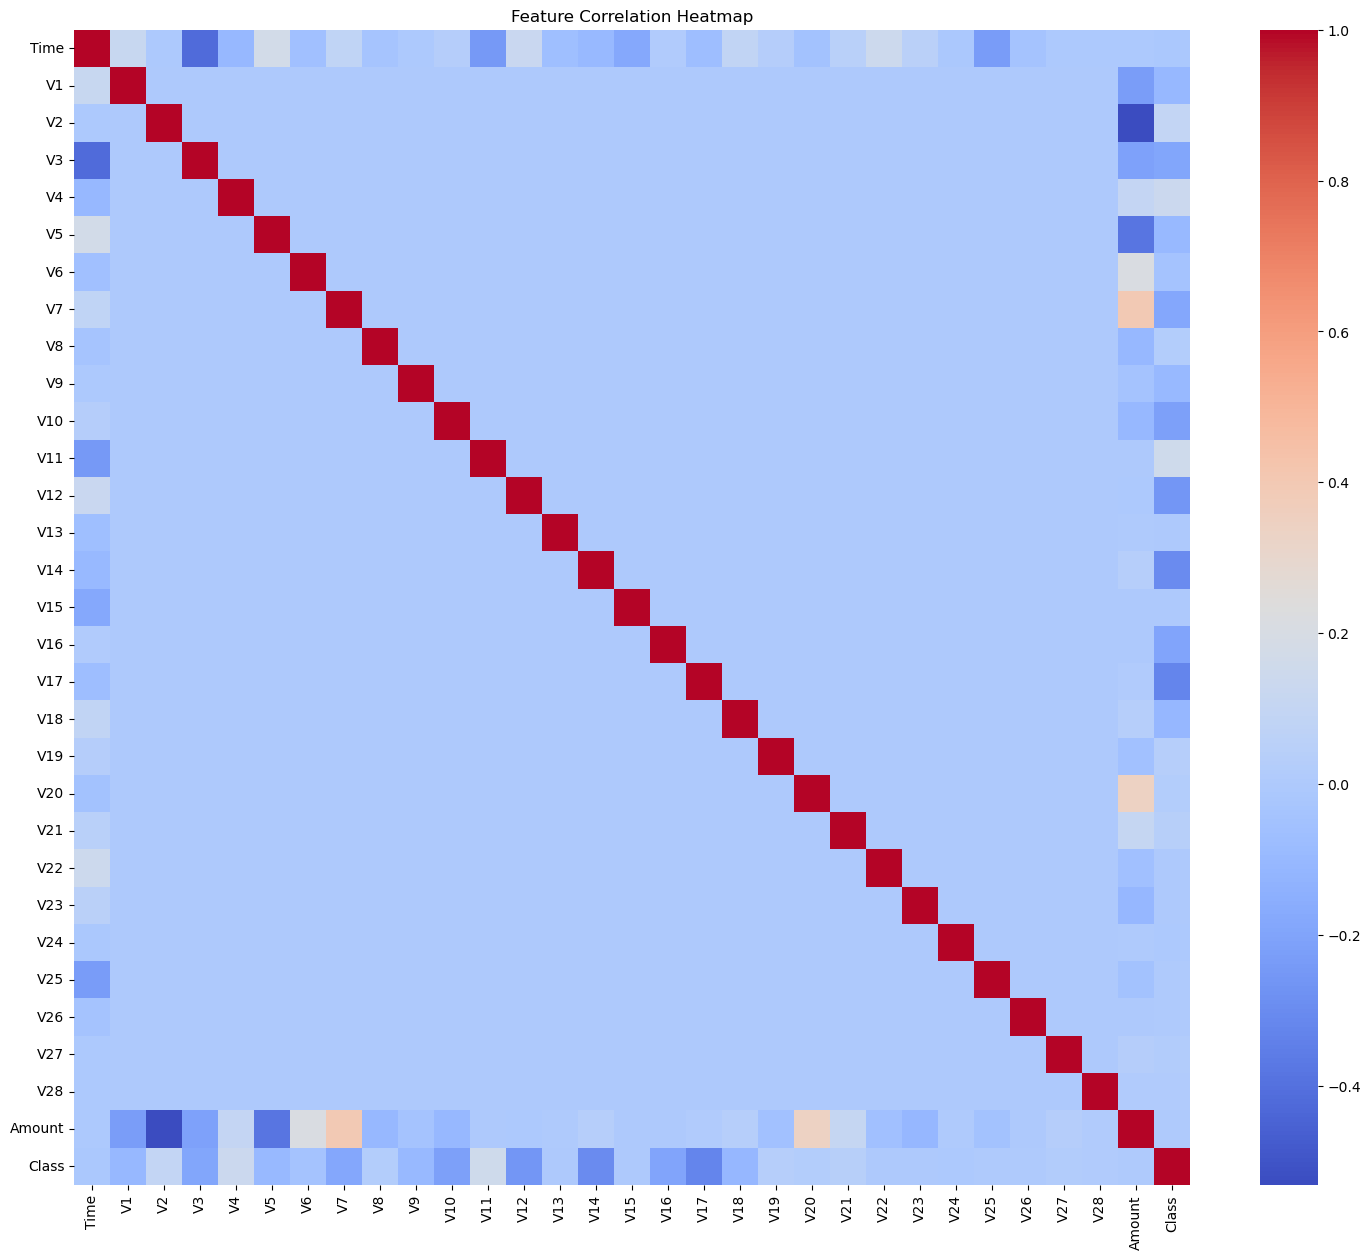

In [12]:
# Correlation heatmap to understand relationships
plt.figure(figsize=(18,15))
corr = creditCardData.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

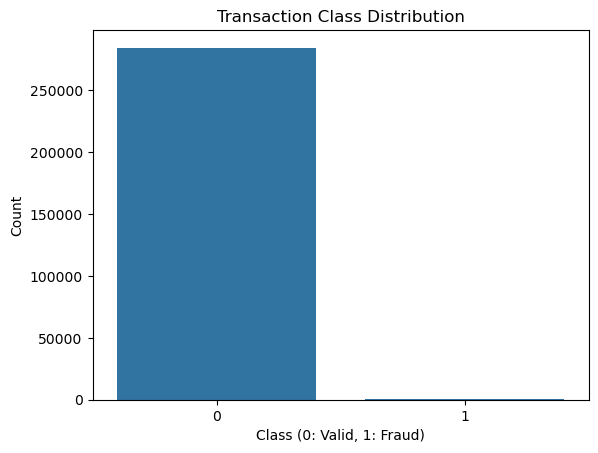

In [13]:
# Class distribution to check for imbalance
sns.countplot(x='Class', data=creditCardData)
plt.title('Transaction Class Distribution')
plt.xlabel('Class (0: Valid, 1: Fraud)')
plt.ylabel('Count')
plt.show()

In [14]:
#here in the dataset the 0 represents a valid transaction and 1 represents fraudulent transaction
#distribution of valid and invalid transaction
creditCardData['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

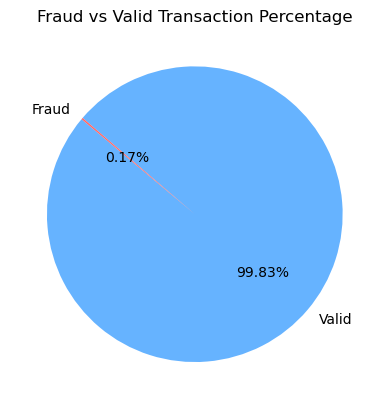

In [15]:
# Visualizing fraud vs valid percentage
fraud_count = creditCardData['Class'].value_counts()
labels = ['Valid', 'Fraud']
colors = ['#66b3ff','#ff6666']

plt.pie(fraud_count, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Fraud vs Valid Transaction Percentage')
plt.show()


In [16]:
valid=creditCardData[creditCardData.Class==0]
invalid=creditCardData[creditCardData.Class==1]

In [17]:
valid

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [18]:
invalid

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


Now lets create a new sample dataset with equal distribution, so that our model can predict output as correct as possible

UNDER-SAMPLING

In [19]:
validSample=valid.sample(n=492)

concatenating the two dataframes for equal distribution

In [20]:
#adding the two dataframes row wise
newDataSet=pd.concat([validSample,invalid],axis=0)

In [21]:
newDataSet.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2950,2497.0,0.881512,-1.521639,0.999563,-0.446934,-1.733189,0.225237,-1.116012,0.269147,-0.288772,...,0.509724,1.068260,-0.223766,0.266801,0.231156,-0.064899,0.021628,0.046270,204.00,0
244276,152280.0,1.692231,-0.264678,0.682662,3.693015,-0.694649,1.291618,-1.264548,0.651974,0.096519,...,0.280552,0.608302,0.284986,0.607941,-0.622023,-0.075929,0.019315,-0.016696,52.73,0
199500,132994.0,1.935790,-0.380959,-0.713501,-0.072024,-0.089563,0.092874,-0.433434,0.042598,0.417101,...,-0.139071,-0.485186,0.360630,0.296984,-0.607417,0.204249,-0.053858,-0.040277,49.49,0
122823,76702.0,-0.011906,-0.158948,1.065925,-1.978760,-0.947083,-0.946361,0.715803,-0.622559,-2.576101,...,-0.478262,-0.904084,0.052363,0.334752,-0.111022,-0.528991,-0.231588,-0.228282,90.56,0
76745,56724.0,-0.759579,1.488063,1.588886,1.352172,0.727373,-0.766555,1.406287,-0.153591,-1.640447,...,0.031297,-0.078485,-0.402899,0.367418,0.717247,-0.014532,-0.029781,0.050381,10.66,0


In [22]:
newDataSet.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


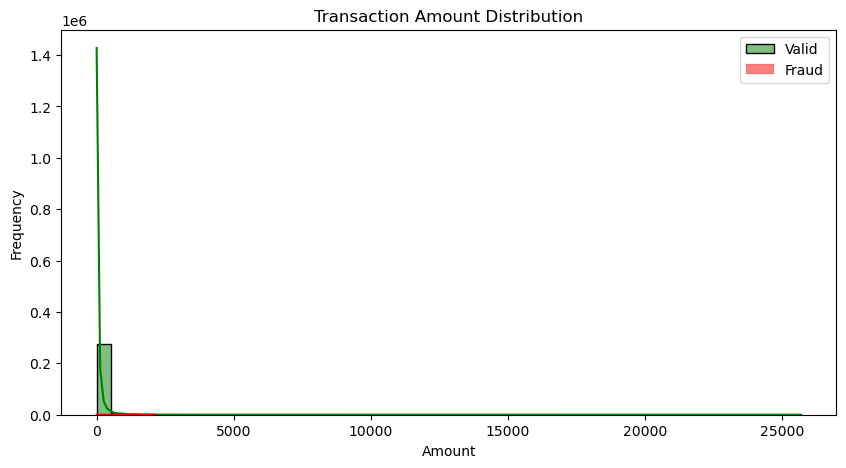

In [23]:
# Amount distribution comparison
plt.figure(figsize=(10,5))
sns.histplot(creditCardData[creditCardData['Class'] == 0]['Amount'], bins=50, color='green', label='Valid', kde=True)
sns.histplot(creditCardData[creditCardData['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)
plt.legend()
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Spliting the data into test and train

In [24]:
X=newDataSet.iloc[:,:-1]
y=newDataSet.Class

In [25]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2950,2497.0,0.881512,-1.521639,0.999563,-0.446934,-1.733189,0.225237,-1.116012,0.269147,-0.288772,...,0.395521,0.509724,1.068260,-0.223766,0.266801,0.231156,-0.064899,0.021628,0.046270,204.00
244276,152280.0,1.692231,-0.264678,0.682662,3.693015,-0.694649,1.291618,-1.264548,0.651974,0.096519,...,-0.274062,0.280552,0.608302,0.284986,0.607941,-0.622023,-0.075929,0.019315,-0.016696,52.73
199500,132994.0,1.935790,-0.380959,-0.713501,-0.072024,-0.089563,0.092874,-0.433434,0.042598,0.417101,...,0.037384,-0.139071,-0.485186,0.360630,0.296984,-0.607417,0.204249,-0.053858,-0.040277,49.49
122823,76702.0,-0.011906,-0.158948,1.065925,-1.978760,-0.947083,-0.946361,0.715803,-0.622559,-2.576101,...,-0.228059,-0.478262,-0.904084,0.052363,0.334752,-0.111022,-0.528991,-0.231588,-0.228282,90.56
76745,56724.0,-0.759579,1.488063,1.588886,1.352172,0.727373,-0.766555,1.406287,-0.153591,-1.640447,...,-0.183624,0.031297,-0.078485,-0.402899,0.367418,0.717247,-0.014532,-0.029781,0.050381,10.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [26]:
y

2950      0
244276    0
199500    0
122823    0
76745     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

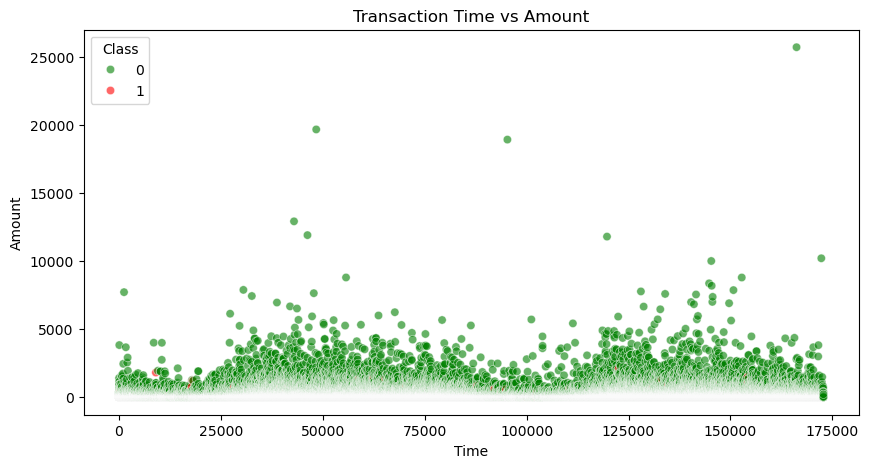

In [28]:
# Time vs Amount scatter plot with class hue
plt.figure(figsize=(10,5))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=creditCardData, palette=['green','red'], alpha=0.6)
plt.title('Transaction Time vs Amount')
plt.show()

CREATING DECISION TREE MODEL

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
treeModel = DecisionTreeClassifier()
treeModel

DecisionTreeClassifier()

In [31]:
#Traing our treeModel
treeModel.fit(X_train,y_train)
#making prediction on our test data
y_pred=treeModel.predict(X_test)

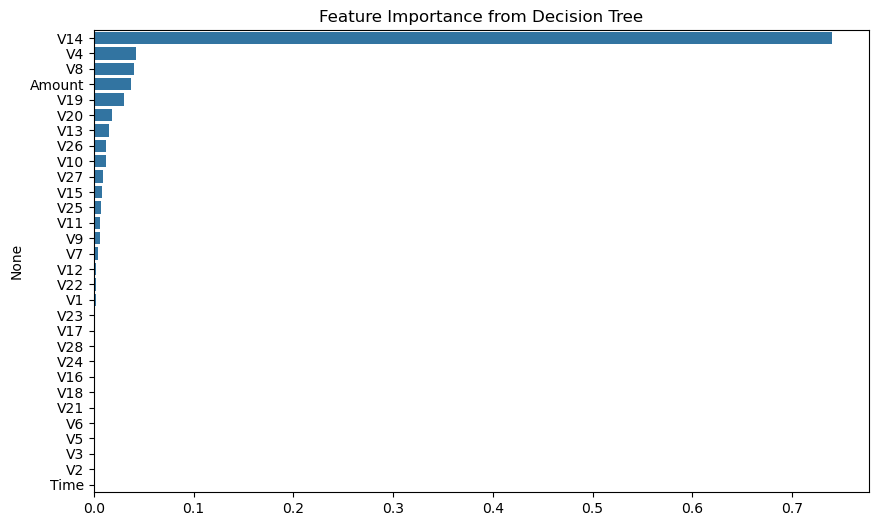

In [32]:
# Feature importance from decision tree
importances = treeModel.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance from Decision Tree')
plt.show()

Checking the accuracy and classification report

In [33]:
accuracy_score(y_pred,y_test)

0.8883248730964467

In [34]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89        98
           1       0.94      0.83      0.88        99

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weighted avg       0.89      0.89      0.89       197



CREATING RANDOM FOREST MODEL

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
randomForestModel = RandomForestClassifier()
randomForestModel

RandomForestClassifier()

In [37]:
#Training the model with independent and dependent features
randomForestModel.fit(X_train,y_train)
y_pred = randomForestModel.predict(X_test)

In [38]:
print(accuracy_score(y_pred,y_test))

0.9543147208121827


In [39]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       109
           1       0.95      0.94      0.95        88

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



K-Nearest Neigh

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn_model = KNeighborsClassifier()
knn_model

KNeighborsClassifier()

In [42]:
#traing the model and making prediction
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [43]:
print(accuracy_score(y_pred,y_test))

0.6395939086294417


In [44]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66        97
           1       0.67      0.58      0.62       100

    accuracy                           0.64       197
   macro avg       0.64      0.64      0.64       197
weighted avg       0.64      0.64      0.64       197

